# Carga de datos - Análisis exploratorio




---
Diccionario: *https://www.indec.gob.ar/ftp/cuadros/menusuperior/eahu/EPH_tot_urbano_estructura_bases_2022.pdf*

DataSet: *https://www.indec.gob.ar/ftp/cuadros/menusuperior/eahu/EPH_Tot_Urbano_3T_2022.zip*



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

Primer data set. Hogares.



In [ ]:
datos = pd.read_csv('hogares_tot.urb_3T_2022.txt', delimiter =";")
# datos.head(2)

In [ ]:
datos.dtypes # Tipos
datos.columns # Columnas
datos.describe() # Describe

---
Tomamos los datos de la ciudad de rosario


In [ ]:
ros = datos[datos["AGLOMERADO"]==4].copy() #copio datos de rosario
ros["IPCF"]=ros["IPCF"].apply(lambda x: float(x.replace(",", "."))) # reemplazo "," ""."



---

Porcentaje de hogares que declaran no tener ganancias.
Cuántas personas deberíamos eliminar.


In [ ]:
len(ros[ros["IPCF"]==0])/len(ros)

0.3907380607814761

In [ ]:
ros[ros["IPCF"]==0]["V1"].value_counts()

1    229
2     41
Name: V1, dtype: int64



---
Dropeamos aquellos 249 que pusieron que no tenian un monto de ingreso per capita familiar pero dicen que ganan plata trabajando.


In [ ]:
# Encontramos las filas que cumplen con la condición
filas_a_eliminar = ros[(ros["IPCF"] == 0) & (ros["V1"].isin(ros[ros["IPCF"] == 0]["V1"]))].index

# Eliminanos las filas encontradas
ros = ros.drop(filas_a_eliminar)

---
Variables a utilizar del data set de Hogares.

CODUSU id.

IV1 Tipo de vivienda.

IV2 ¿Cuántos ambientes/habitaciones tiene la vivienda en total?

IV6 Tiene agua...

IV12_1 La vivienda está ubicada cerca de basural/es

IV12_3 La vivienda está ubicada en villa de emergencia (por observación)

II7 Régimen de tenencia

V1 ...de lo que ganan en el trabajo?

IX_TOT Cantidad de miembros del hogar

IX_MEN10 Cantidad de miembros del hogar menores de 10 años

IPCF Monto de ingreso per cápita familiar (ver Anexo I)


In [ ]:
columns = ["CODUSU"	,"IV1","IV2","IV6"
,"IV12_1","IV12_3","II7","V1","IX_TOT","IX_MEN10","IPCF"]

In [ ]:
data = ros[columns].copy() #copiamos el data set con las columnas de interes



---
DataSet Personas


In [ ]:
personas = pd.read_csv("personas_tot.urb_3T_2022.txt", encoding="latin1", delimiter =";")
#personas.head(2)

<ipython-input-17-0c1d23048e2f>:1: DtypeWarning: Columns (63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  personas = pd.read_csv("personas_tot.urb_3T_2022.txt", encoding="latin1", delimiter =";")


In [ ]:
personas.dtypes # Tipos
personas.columns # Columnas
personas.describe() # Describe



---
Tomamos los datos de Rosario.



In [ ]:
personas = personas[personas["AGLOMERADO"]==4].copy() # Nos quedamos con las personas de rosario
personas["IPCF"]=personas["IPCF"].apply(lambda x: float(x.replace(",", "."))) # Mismo reemplazo



---
Columnas de interés datasets de personas.

CH08 ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan?

CH12 ¿Cuál es el nivel más alto que cursa o cursó?

ESTADO Condición de actividad trabajo

CAT_OCUP Categoría ocupacional

PP04A ¿El negocio/empresa/institución/actividad en la que trabaja es... (se refiere al que trabaja más horas semanales)

PP04G ¿Dónde realiza principalmente sus tareas?

PP05B2_ANO años

P47T Monto de ingreso total individual


In [ ]:
columnas = ["CODUSU","CH04","CH06","CH08","CH12","ESTADO","CAT_OCUP","PP04A","PP04G","P47T"] # Establecemos columnas de interes

In [ ]:
pers = personas[columnas].copy() # copiamos un nuevo dataset
#pers.head(1)



---
Merge de ambos datasets. Usando el id.



In [ ]:
datos = data.merge(pers, left_on='CODUSU', right_on='CODUSU') # Mergeamos ambos data sets
#datos.head()

In [ ]:
datos.dtypes # Tipos
datos.columns # Columnas
datos.describe() # Describe

# Limpieza y arreglos.



---
Una vez tenemos el dataset "final", pasamos a renombrar las columnas para una mejor comprensión.


In [ ]:
nuevos_nombres = {
    'IV1': 'Tipo_Vivienda',
    'IV2': 'Cantidad_Ambientes',
    'IV6': 'Tiene_Agua',
    'IV12_1': 'Cerca_de_Basural',
    'IV12_3': 'Vivienda_en_Villa',
    'II7': 'Regimen_Tenencia',
    'V1': 'Ganan_en_Trabajo',
    'IX_TOT': 'Miembros_Hogar',
    'IX_MEN10': 'Menores_10_Hogar',
    'IPCF': 'Ingreso_Per_Capita',
    'CH08': 'Cobertura_Medica',
    'CH12': 'Nivel_Educacion',
    'ESTADO': 'Condicion_Actividad',
    'CAT_OCUP': 'Categoria_Ocupacional',
    'PP04A': 'Tipo_Negocio',
    'PP04G': 'Ubicacion_Tareas',
    'P47T': 'Ingreso_Total_Individual',
    'CH06': 'Edad',
    'CH04': "Sexo"
}
datos.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
# Comprobamos
datos.columns



---
Tratemos de entender nuestra variable



In [ ]:
datos["Ingreso_Per_Capita"].describe()

count      1085.000000
mean      52194.871862
std       38014.915342
min        4000.000000
25%       25000.000000
50%       42333.330000
75%       66666.670000
max      286000.000000
Name: Ingreso_Per_Capita, dtype: float64


---
El data set presenta mas de una persona por casa, por lo que decido quedarme con el "Jefe" de la casa, es decir aquella persona que tenga un salario Individual más alto.

In [ ]:
datos["CODUSU"].head(5)

0    TQRMNOPYWHKKKNCDEFKID00787710
1    TQRMNOPYWHKKKNCDEFKID00787710
2    TQRMNOPYWHKKKNCDEFKID00787710
3    TQRMNOPYWHKKKNCDEFKID00787710
4    TQRMNOPYWHKKKNCDEFKID00787710
Name: CODUSU, dtype: object



---
Por eso ordenamos por Ingreso Individual y nos quedamos con el primer dato de cada casa.


In [ ]:
datos = datos.sort_values(by="Ingreso_Total_Individual", ascending=False)

datos = datos.drop_duplicates(subset="CODUSU", keep="first")



---
Renombramos las columnas de variables categóricas.

Podemos ver los datos correspondientes en el diccionario.

In [ ]:
datos['Tipo_Vivienda'] = datos['Tipo_Vivienda'].replace({1: 'Casa', 2: 'Departamento', 3: 'Pieza_Inquilinato', 4: 'Pieza_Hotel_Pension', 5: 'Local_No_Construido'})
datos['Tiene_Agua'] = datos['Tiene_Agua'].replace({1: 'Cañería_Dentro', 2: 'Fuera_Dentro_Terreno', 3: 'Fuera_Terreno'})
datos['Regimen_Tenencia'] = datos['Regimen_Tenencia'].replace({1: 'Propietario_Viv_Terreno', 2: 'Propietario_Solo_Viv', 3: 'Inquilino_Arrendatario', 4: 'Ocupante_Pago_Impuestos', 5: 'Ocupante_Relacion_Dependencia', 6: 'Ocupante_Gratuito', 7: 'Ocupante_Hecho', 8: 'En_Sucesion'})
datos['Ganan_en_Trabajo'] = datos['Ganan_en_Trabajo'].replace({1: 'Viven_De_Trabajo', 2: 'No_Viven_De_Trabajo'})
datos['Cobertura_Medica'] = datos['Cobertura_Medica'].replace({1: 'Obra_Social', 2: 'Mutual_Prepaga_Servicio', 3: 'Planes_Seguros_Publicos', 4: 'No_Paga_No_Descuentan', 9: 'Ns_Nr', 12: 'Obra_Social_Mutual_Prepaga', 13: 'Obra_Social_Planes_Seguros', 23: 'Mutual_Prepaga_Servicio_Planes_Seguros', 123: 'Obra_Social_Mutual_Prepaga_Planes_Seguros'})
datos['Nivel_Educacion'] = datos['Nivel_Educacion'].replace({1: 'Jardin_Preescolar', 2: 'Primario', 3: 'EGB', 4: 'Secundario', 5: 'Polimodal', 6: 'Terciario', 7: 'Universitario', 8: 'Posgrado_Universitario', 9: 'Educacion_Especial'})
datos['Condicion_Actividad'] = datos['Condicion_Actividad'].replace({0: 'Entrevista_No_Realizada', 1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor_10_Años'})
datos['Categoria_Ocupacional'] = datos['Categoria_Ocupacional'].replace({1: 'Patron', 2: 'Cuenta_Propia', 3: 'Obrero_Empleado', 4: 'Trabajador_Familiar_Sin_Remuneracion', 9: 'Ns_Nr'})
datos['Tipo_Negocio'] = datos['Tipo_Negocio'].replace({1: 'Estatal', 2: 'Privada', 3: 'Otro_Tipo'})
datos['Ubicacion_Tareas'] = datos['Ubicacion_Tareas'].replace({1: 'Local_Oficina_Establecimiento', 2: 'Puesto_Kiosco_Fijo_Callejero', 3: 'En_Vehiculos_Bicicleta_Moto_Auto_Barco_Bote', 4: 'En_Vehiculo_Transporte_Personas_Mercaderias', 5: 'Obras_Construccion_Infraestructura_Mineria', 6: 'En_Esta_Vivienda', 7: 'En_Vivienda_Socio_Patron', 8: 'En_Domicilio_Local_Clientes', 9: 'En_Calle_Espacios_Publicos_Ambulante', 10: 'En_Otro_Lugar'})
datos['Vivienda_en_Villa'] = datos['Vivienda_en_Villa'].replace({1: 'Si', 2: 'No'})
datos['Cerca_de_Basural'] = datos['Cerca_de_Basural'].replace({1: 'Si', 2: 'No'})
datos['Sexo'] = datos['Sexo'].replace({1: 'Hombre', 2: 'Mujer'})

In [ ]:
# Comprobamos
datos.head(2)

# Gráficos y Correlación



---

Correlación

<ipython-input-38-873b148a9764>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = copi.corr()


<Axes: >

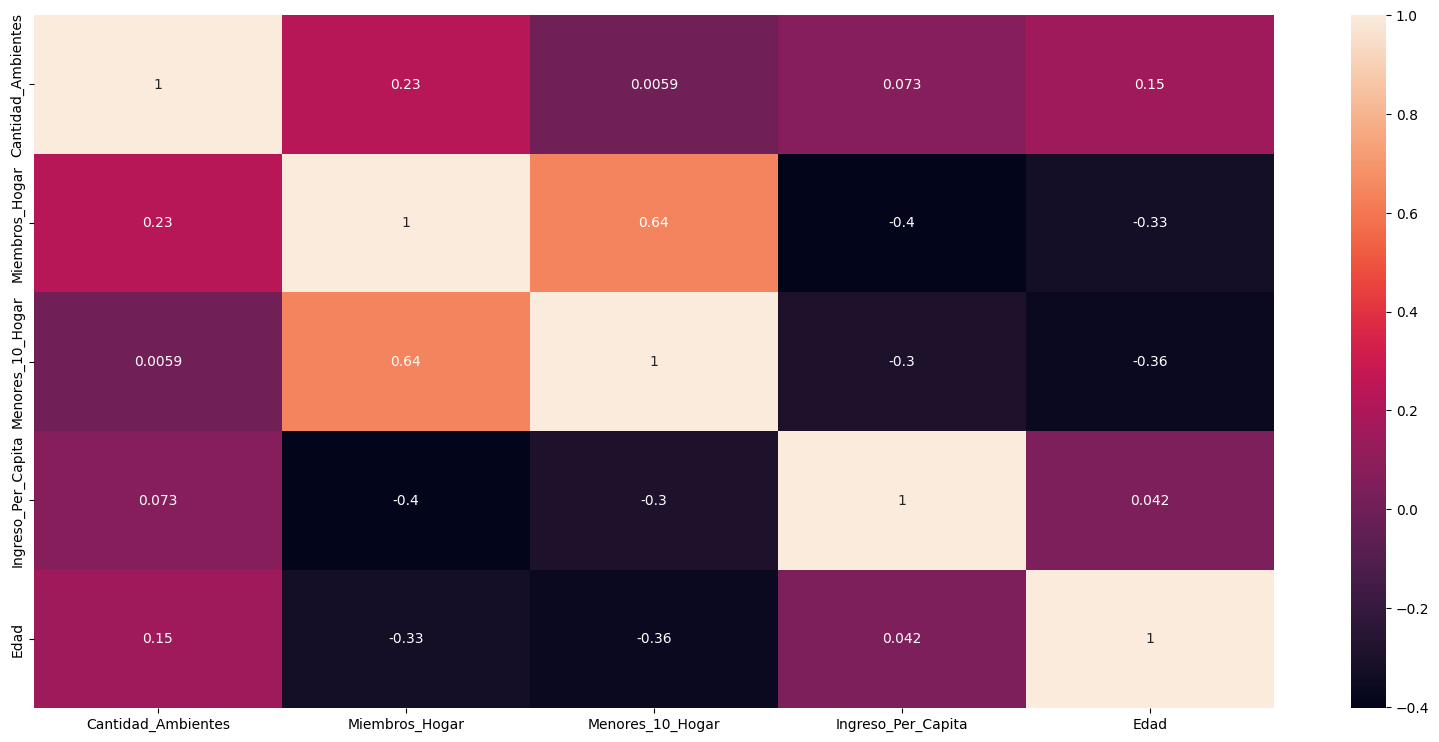

In [ ]:
columnas = ["Cantidad_Ambientes","Cerca_de_Basural","Vivienda_en_Villa","Ganan_en_Trabajo","Miembros_Hogar","Menores_10_Hogar","Ingreso_Per_Capita","Sexo","Edad"]
copi = datos[columnas].copy()

corr = copi.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, annot=True)



---
Relacion entre el Ingreso Per Cápita, Ingreso Individual y miembros del hogar


In [ ]:
sns.scatterplot(x="Ingreso_Per_Capita", y="Ingreso_Total_Individual",hue="Miembros_Hogar",palette="ch:r=-.2,d=.3_r",
                data = datos)



---
Distribución Ingreso Per Capita


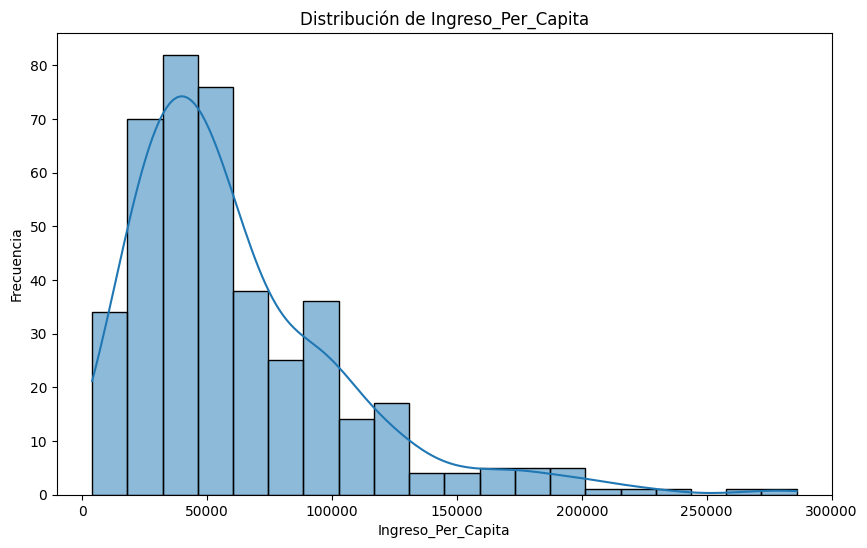

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(datos['Ingreso_Per_Capita'], bins=20, kde=True)
plt.title('Distribución de Ingreso_Per_Capita')
plt.xlabel('Ingreso_Per_Capita')
plt.ylabel('Frecuencia')
plt.show()



---
Relación entre algunas variables


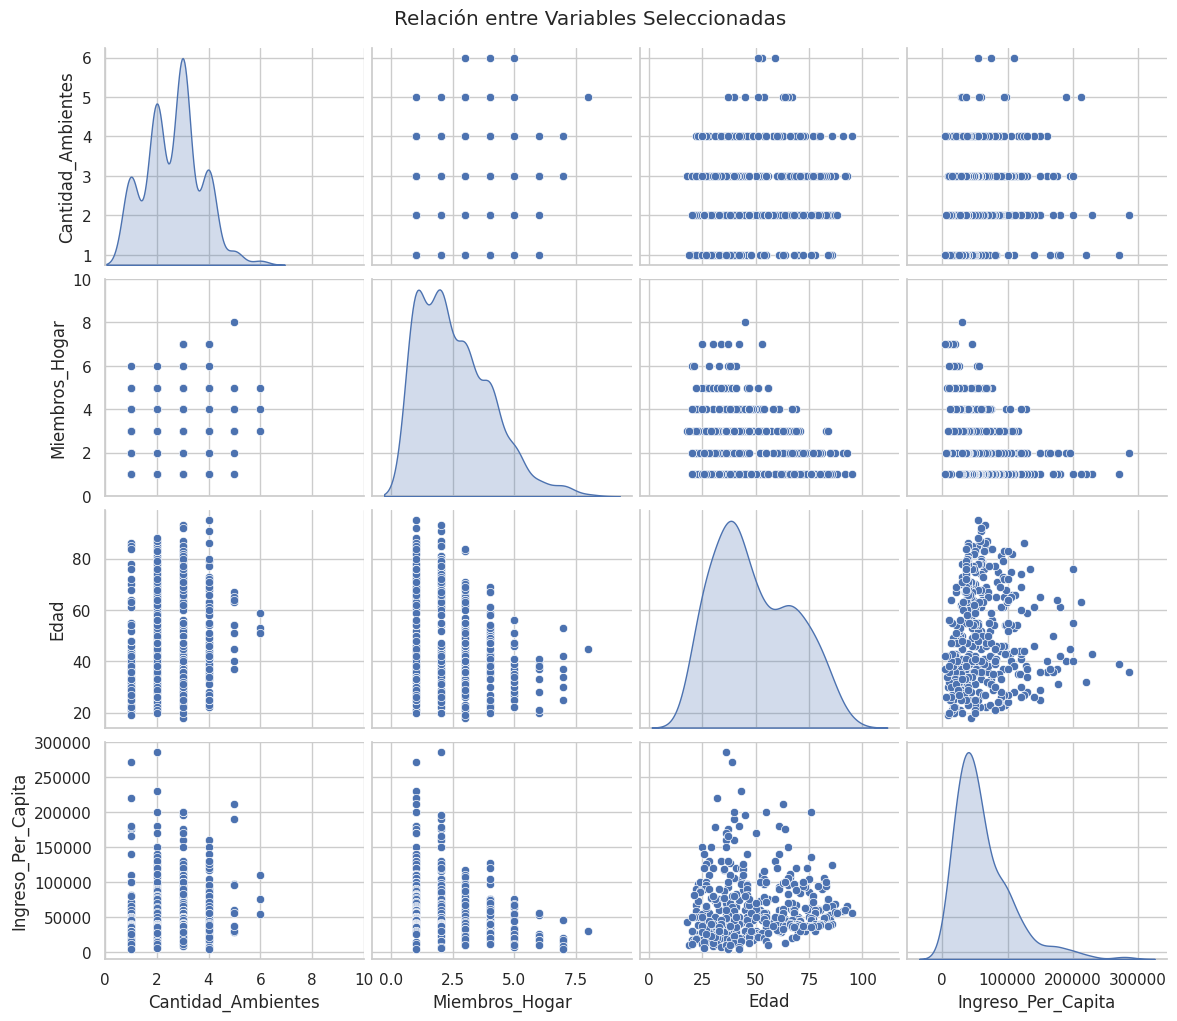

In [53]:
variables_interes = ['Cantidad_Ambientes', 'Miembros_Hogar', 'Edad', 'Ingreso_Per_Capita']

sns.set(style="whitegrid")
g = sns.pairplot(datos[variables_interes], height=2.5, aspect=1.2, diag_kind="kde")
g.fig.suptitle("Relación entre Variables Seleccionadas", y=1.02)

g.axes[0, 0].set_xlim(0, 10)
g.axes[1, 1].set_ylim(0, 10)

# Mostrar el pairplot mejorado
plt.show()



---
Boxplot de variables categóricas


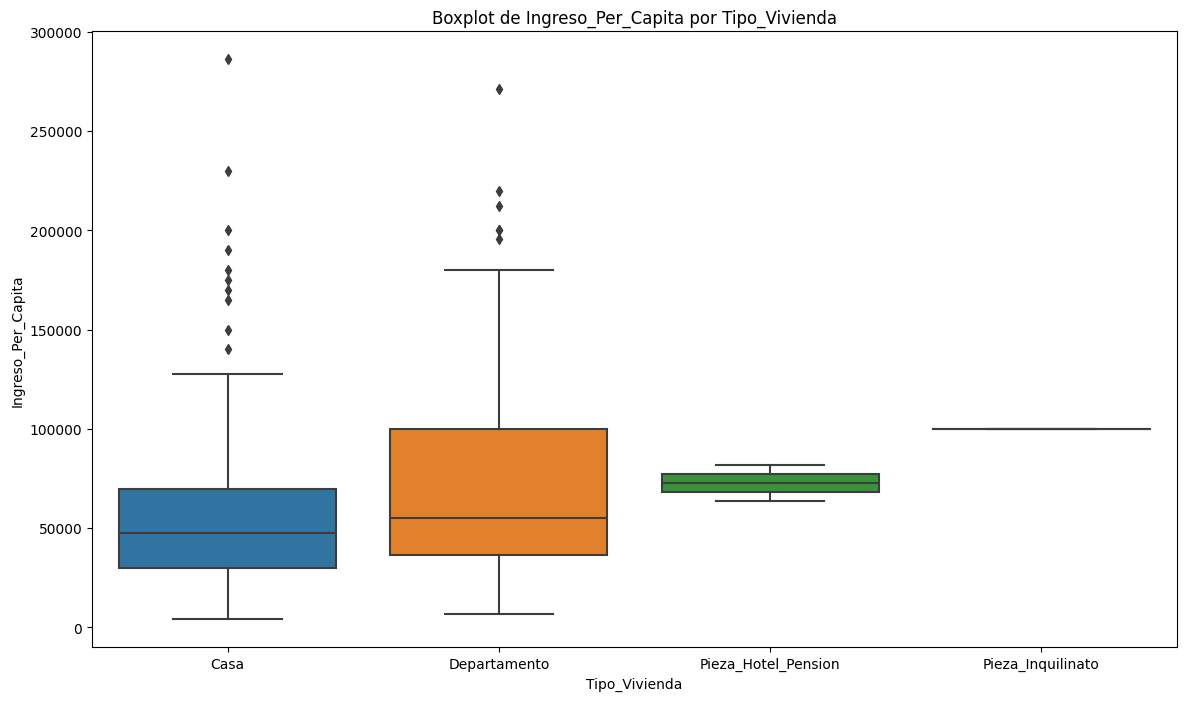

In [52]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Tipo_Vivienda', y='Ingreso_Per_Capita', data=datos)
plt.title('Boxplot de Ingreso_Per_Capita por Tipo_Vivienda')
plt.xlabel('Tipo_Vivienda')
plt.ylabel('Ingreso_Per_Capita')
plt.show()

# Dummies

---
Obetenemos las dummies.


In [55]:
columnas_categoricas = ['Tipo_Vivienda', 'Tiene_Agua', 'Regimen_Tenencia', 'Ganan_en_Trabajo', 'Cobertura_Medica', 'Nivel_Educacion', 'Condicion_Actividad', 'Categoria_Ocupacional', 'Tipo_Negocio', 'Ubicacion_Tareas', 'Vivienda_en_Villa', 'Cerca_de_Basural']

datos_dummy = pd.get_dummies(datos[columnas_categoricas], drop_first=True) # Tmb eliminamos la primera

data = pd.concat([datos, datos_dummy], axis=1)

# Eliminamos las columnas originales que fueron convertidas en dummy
data = data.drop(columns=columnas_categoricas)

data.head(2)

,CODUSU,Cantidad_Ambientes,Miembros_Hogar,Menores_10_Hogar,Ingreso_Per_Capita,Sexo,Edad,Ingreso_Total_Individual,Tipo_Vivienda_Departamento,Tipo_Vivienda_Pieza_Hotel_Pension,...,Tipo_Negocio_Privada,Ubicacion_Tareas_En_Calle_Espacios_Publicos_Ambulante,Ubicacion_Tareas_En_Domicilio_Local_Clientes,Ubicacion_Tareas_En_Esta_Vivienda,Ubicacion_Tareas_En_Vehiculo_Transporte_Personas_Mercaderias,Ubicacion_Tareas_En_Vehiculos_Bicicleta_Moto_Auto_Barco_Bote,Ubicacion_Tareas_Local_Oficina_Establecimiento,Ubicacion_Tareas_Obras_Construccion_Infraestructura_Mineria,Vivienda_en_Villa_Si,Cerca_de_Basural_Si
476,TQRMNOPQVHMLLRCDEFKID00710566,4,4,2,127500.0,Hombre,38,360000.0,0,0,...,1,0,0,0,0,0,1,0,0,0
1017,TQRMNOSTXHMMLNCDEFKID00714262,2,2,0,286000.0,Hombre,36,330000.0,0,0,...,0,0,0,0,0,0,1,0,0,0




---
Correlación con las dummies


In [ ]:
corr = data.corr()
umbral = 0

corr_significativos = corr[(corr > umbral) | (corr < -umbral)]

relaciones_significativas = pd.DataFrame(columns=['Variable_1', 'Variable_2', 'Correlacion'])
for i in range(len(corr_significativos.columns)):
    for j in range(i+1, len(corr_significativos.columns)):
        variable1 = corr_significativos.columns[i]
        variable2 = corr_significativos.index[j]
        correlacion = corr_significativos.iloc[i, j]
        relaciones_significativas = pd.concat([relaciones_significativas, pd.DataFrame({'Variable_1': [variable1], 'Variable_2': [variable2], 'Correlacion': [correlacion]})], ignore_index=True)

relaciones_significativas = relaciones_significativas[(relaciones_significativas['Correlacion'] > umbral) | (relaciones_significativas['Correlacion'] < -umbral)]

relaciones_significativas = relaciones_significativas.sort_values(by='Correlacion', ascending=False)
relaciones_significativas[relaciones_significativas["Variable_1"]=="Ingreso_Per_Capita"]

# Modelo



---

Modelo

Predecir = Ingreso Per capita familiar

modelo = (ingresopercapita ~ Cobertura_Medica_Obra_Social_Mutual_Prepaga + Nivel_Educacion_Posgrado_Universitario + Nivel_Educacion_Universitario +Tipo_Vivienda_Departamento+ Vivienda_en_Villa_Si + Nivel_Educacion_Secundario +Nivel_Educacion_Primario + Regimen_Tenencia_Propietario_Solo_Viv + Cobertura_Medica_No_Paga_No_Descuentan)

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
modelo = smf.ols(formula="Ingreso_Per_Capita ~ Cobertura_Medica_Obra_Social_Mutual_Prepaga + Nivel_Educacion_Posgrado_Universitario + Nivel_Educacion_Universitario +Tipo_Vivienda_Departamento+ Vivienda_en_Villa_Si + Nivel_Educacion_Secundario +Nivel_Educacion_Primario + Regimen_Tenencia_Propietario_Solo_Viv + Cobertura_Medica_No_Paga_No_Descuentan", data=data).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     Ingreso_Per_Capita   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     19.96
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.97e-28
Time:                        23:45:26   Log-Likelihood:                -5009.9
No. Observations:                 420   AIC:                         1.004e+04
Df Residuals:                     410   BIC:                         1.008e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------



---
Predict



In [ ]:
predicciones = modelo.predict()

plt.figure(figsize=(10, 6))
plt.scatter(datos['Ingreso_Per_Capita'], predicciones, alpha=0.7, label='Predicciones')
plt.plot([min(datos['Ingreso_Per_Capita']), max(datos['Ingreso_Per_Capita'])], [min(datos['Ingreso_Per_Capita']), max(datos['Ingreso_Per_Capita'])], color='red', linestyle='--', linewidth=2, label='Línea de 45 grados')
plt.title('Comparación entre Valores Originales y Predicciones')
plt.xlabel('Valores Originales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()



---

Ajuste de modelo

---



In [63]:
modelo = smf.ols(formula="Ingreso_Per_Capita ~ Cobertura_Medica_Obra_Social_Mutual_Prepaga + Nivel_Educacion_Posgrado_Universitario + Nivel_Educacion_Universitario  + Regimen_Tenencia_Propietario_Solo_Viv + Cobertura_Medica_No_Paga_No_Descuentan", data=data).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     Ingreso_Per_Capita   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     34.65
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.38e-29
Time:                        23:49:59   Log-Likelihood:                -5012.8
No. Observations:                 420   AIC:                         1.004e+04
Df Residuals:                     414   BIC:                         1.006e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

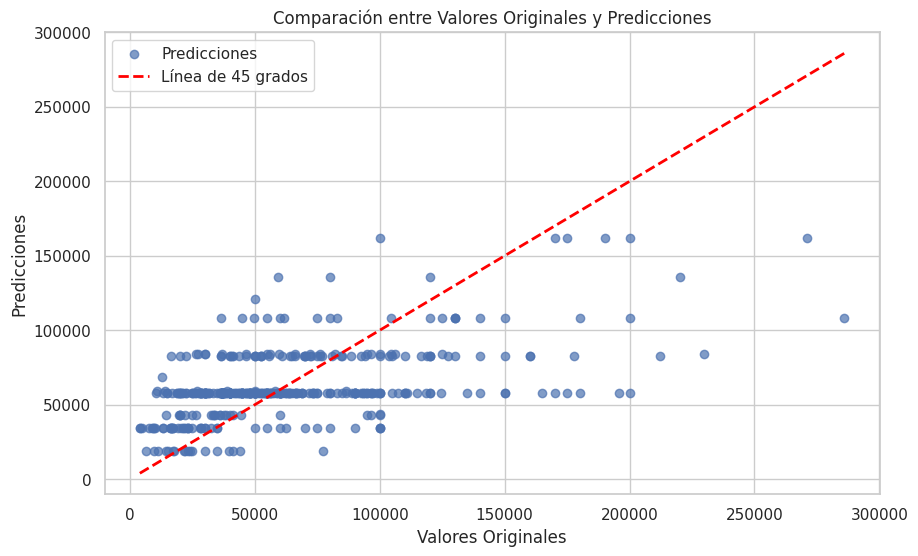

In [64]:
predicciones = modelo.predict()

plt.figure(figsize=(10, 6))
plt.scatter(datos['Ingreso_Per_Capita'], predicciones, alpha=0.7, label='Predicciones')
plt.plot([min(datos['Ingreso_Per_Capita']), max(datos['Ingreso_Per_Capita'])], [min(datos['Ingreso_Per_Capita']), max(datos['Ingreso_Per_Capita'])], color='red', linestyle='--', linewidth=2, label='Línea de 45 grados')
plt.title('Comparación entre Valores Originales y Predicciones')
plt.xlabel('Valores Originales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()